# Intro to DNN Using TensorFlow (Shallow Neural Networks)

`pip install keras`

In [39]:
import tensorflow as tf #will be used for activation functions
from tensorflow.keras import models, layers #allow us to build our model and its components as layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


- The MNIST data comes in 2D format (we previously used already flattened format)
- We need to flatten the dataset to use a traditional DNN

![fl](https://testerstories.com/files/ai_and_ml/ml-mnist-2d-to-1d.png)

## Step 1: Loading and Splitting The Data 

In [3]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [5]:
X_train.min(), X_train.max()

(0, 255)

In [6]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
X_test.shape[0]/(X_test.shape[0]+X_train.shape[0])

0.14285714285714285

In [8]:
X_train.nbytes/1000000

47.04

## Step 2: Building The Neural Network Model

- In this stage, we make a decision about the architecture of our Neural Network and the components that will be used.
- For this exercise, we'll be using `Sequential` to assemble the following:
    - First Layer: Input Layer 
    - Second Layer: Flattening functionality
    - Third Layer: Hidden Layer with RelU Activation Function and 128 neurons
    - Fourth Layer: Output 

In [9]:
nn_model = models.Sequential(
                        [
                       layers.Input(shape=(28,28)),
                       layers.Flatten(),
                       layers.Dense(128, activation='relu'), # the choice of num of neurons is a hyperparameter and can be perfected via trial and error
                       layers.Dense(10) # choosing 10 neurons that match the number of predicted classes
                        ] 
                    )

In [10]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
784 * 128 + 128

100480

- The summary is useful to get info about the architecture and num of layers and neurons.
- The first number  is the input (num of pixels)
- Second row shows 100,480 parameters = (784 Inp neurons x 128 HL neurons) weight count + 128 biases. Or 100,352 weights + 128 biases
- Third row 1,290 = 128 * 10 + 10

## Step 3: Defining The Loss Function And The Optimizer

- The loss function measures the difference between predicted outputs and actual outputs
- We have different types:
    - Regression:
        - Mean Squared Error (MSE)
        - Mean Absolute Error (MAE)
    - Classification:
        - Binary Cross-Entropy Loss
        - Categorical Cross-Entropy
- Since we have 10 categories, we need to use `SparseCategoricalCrossentropy`
- It's always recommended to start with the Adam optimizer because it has been proven it's the best of the best.
> Note 1: Although it was proven that Adam gives the best results, that doesn't mean we should ignore others. We can consider them if the model doesn't perform well. (aka Hyperparameter tuning)

> Note 2: Since we don't have an activation function in the output layer, we need to enable `from_logits` functionality.

In [12]:
from tensorflow.keras import losses

loss_fn = losses.SparseCategoricalCrossentropy(from_logits=True)

In [13]:
opt_algo = 'adam'

## Step 4: Compile The Model

Compiling the model simply attaches the loss func, optimizer, and loss measurement into the main model.

In [14]:
nn_model.compile(optimizer=opt_algo,
                 loss=loss_fn,
                 metrics=['accuracy']
                 )

In [15]:
epoch_num = 6
#we define the fit as an object to preserve the training log history
model_history = nn_model.fit(X_train,
                             y_train,
                             validation_split=0.2,
                             epochs=epoch_num
                                )

Epoch 1/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step - accuracy: 0.8175 - loss: 7.3567 - val_accuracy: 0.8829 - val_loss: 0.5453
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9033 - loss: 0.4318 - val_accuracy: 0.9120 - val_loss: 0.3748
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.9276 - loss: 0.2901 - val_accuracy: 0.9268 - val_loss: 0.3203
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.9348 - loss: 0.2570 - val_accuracy: 0.9332 - val_loss: 0.2985
Epoch 5/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - accuracy: 0.9359 - loss: 0.2517 - val_accuracy: 0.9336 - val_loss: 0.2963
Epoch 6/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - accuracy: 0.9461 - loss: 0.2099 - val_accuracy: 0.9369 - val_loss: 0.2636


- The model fits the data using 6 epochs
- We can see that accuracy is improving over num of epochs and loss is decreasing for both Training and Validation.
- Therefore, we don't have overfitting.

## Step 5: Final Evaluation

In [16]:
nn_model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - 418us/step - accuracy: 0.9327 - loss: 0.2890


[0.2890131175518036, 0.932699978351593]

Another way to evaluate a mode, is to plot the history

In [17]:
model_history.history #our log was captured in a dictionary

{'accuracy': [0.8559374809265137,
  0.9093124866485596,
  0.9276458621025085,
  0.9334999918937683,
  0.9380208253860474,
  0.9445833563804626],
 'loss': [2.83634352684021,
  0.40272167325019836,
  0.2970728874206543,
  0.2662530243396759,
  0.2440980076789856,
  0.22311528027057648],
 'val_accuracy': [0.8829166889190674,
  0.9120000004768372,
  0.9267500042915344,
  0.9331666827201843,
  0.9335833191871643,
  0.9369166493415833],
 'val_loss': [0.5452569723129272,
  0.37484583258628845,
  0.32026591897010803,
  0.2984551191329956,
  0.2963266670703888,
  0.26360493898391724]}

In [18]:
plt.style.use('bmh')

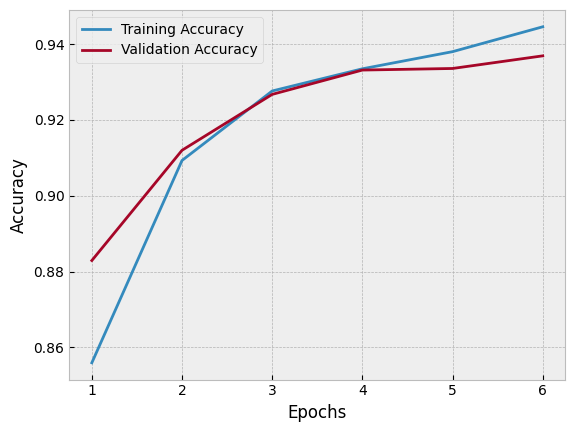

In [19]:
epoch_axis_val = range(1,epoch_num+1)
plt.plot(epoch_axis_val,model_history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epoch_axis_val,model_history.history['val_accuracy'], label = 'Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

- We can see that a gap starts to form between training and validation, which is an indicator of overfitting emerging
- The difference is not substantial yet. Therefore, epoch of 5 or 6 is  a good number to use.

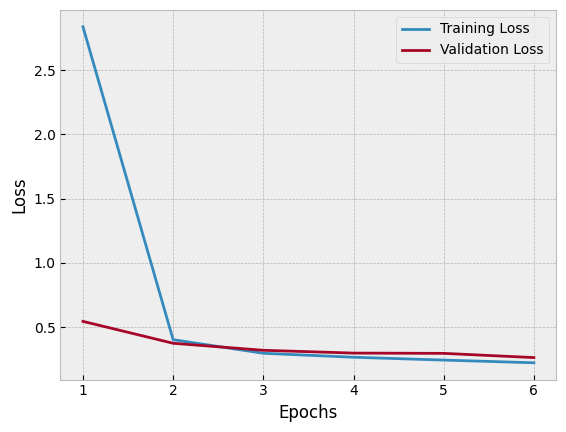

In [20]:
plt.plot(epoch_axis_val,model_history.history['loss'], label = 'Training Loss')
plt.plot(epoch_axis_val,model_history.history['val_loss'], label = 'Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Optional Step: Visual Evaluation

Make the prediction of the test data

In [21]:
predictions = nn_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step


In [22]:
predictions

array([[-41.724167  , -18.918526  , -13.663322  , ...,  15.169511  ,
        -13.696757  , -18.4467    ],
       [ 28.135765  ,  63.777653  ,  78.120575  , ...,  28.647732  ,
         11.497649  , -45.014957  ],
       [ -7.607715  ,  18.106054  ,   8.71617   , ...,  10.481345  ,
          0.44736898,   1.0238554 ],
       ...,
       [-45.45288   , -35.849747  ,   9.467047  , ...,   7.1334667 ,
          2.5849164 ,   4.5632586 ],
       [ 46.427498  ,  43.1412    ,   5.948466  , ...,  28.232206  ,
         45.271584  , -39.898987  ],
       [-42.29484   , -48.063248  , -40.423153  , ..., -52.96675   ,
        -57.610443  , -57.97733   ]], dtype=float32)

Since we don't have an activation function in the output layer, the output is raw. Therefore, we need to convert it to readable output (10 classes) using `argmax()` function.

In [45]:
first_prediction = tf.math.softmax(predictions[0])
first_prediction

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.9560957e-25, 1.5694744e-15, 3.0064915e-13, 1.8426475e-09,
       3.3302908e-16, 1.2141107e-11, 0.0000000e+00, 1.0000000e+00,
       2.9076291e-13, 2.5157361e-15], dtype=float32)>

In [50]:
# if you sum up the prob values above
tf.reduce_sum(first_prediction)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

- You can see the probabilities above for each class.
- They all add to 1

In [47]:
first_prediction_final = tf.math.argmax(first_prediction)
first_prediction_final

<tf.Tensor: shape=(), dtype=int64, numpy=7>

The first prediction is 7

Get the results for all in one shot.

In [51]:
predicted_classes = tf.math.argmax(predictions, axis=1)

In [52]:
predicted_classes[:20]

<tf.Tensor: shape=(20,), dtype=int64, numpy=array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4])>

In [53]:
num_samples = 15
sample_X = X_test[:num_samples]
sample_images = sample_X.reshape(num_samples, 28, 28) 
sample_labels_pred = predicted_classes[:num_samples]


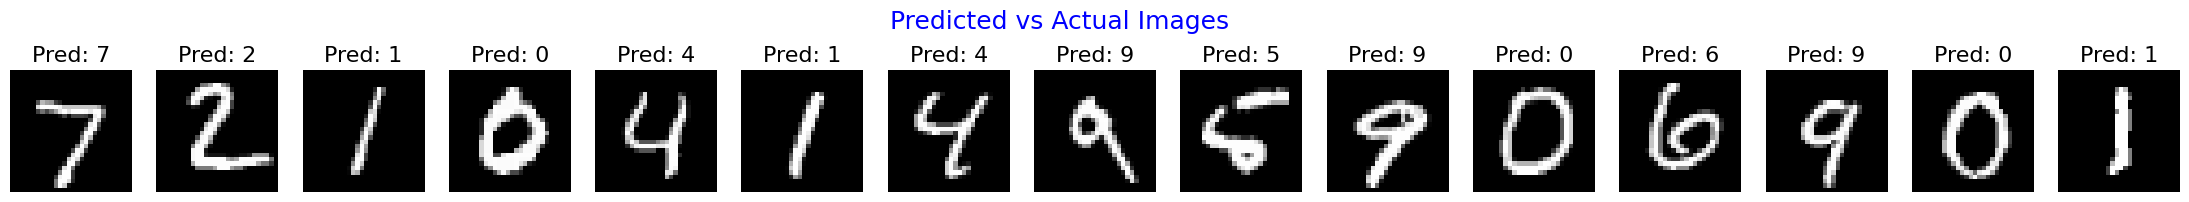

In [54]:
plt.figure(figsize=(28, 3))
plt.suptitle("Predicted vs Actual Images", fontsize=18, color='Blue', y=0.9)


for img in range(num_samples):
    plt.subplot(1, num_samples, img +1)
    plt.imshow(sample_images[img], cmap='gray')
    plt.title(f'Pred: {sample_labels_pred[img]}', fontsize=16)
    plt.axis('off')

Take a look at the labels that did not match (pred vs actual)

In [55]:
predicted_classes != y_test

<tf.Tensor: shape=(10000,), dtype=bool, numpy=array([False, False, False, ..., False, False, False])>

In [56]:
# use the nonzero in numpy to get the values that satisfy the condition above

misclassified_indices = np.nonzero(predicted_classes != y_test)
misclassified_indices # indices of the labels that did not match

(array([  18,   38,   62,   97,  111,  119,  149,  151,  158,  193,  195,
         211,  217,  230,  241,  247,  259,  291,  300,  303,  320,  321,
         326,  340,  352,  358,  359,  366,  381,  405,  445,  447,  448,
         449,  450,  457,  468,  479,  492,  495,  507,  508,  511,  547,
         548,  552,  569,  582,  583,  591,  605,  610,  619,  638,  659,
         684,  691,  692,  699,  707,  715,  717,  720,  726,  734,  738,
         810,  839,  882,  887,  890,  894,  898,  922,  924,  930,  938,
         939,  950,  956,  962,  965,  982, 1012, 1014, 1032, 1039, 1045,
        1050, 1107, 1112, 1122, 1157, 1178, 1181, 1182, 1191, 1194, 1204,
        1206, 1212, 1226, 1228, 1232, 1234, 1239, 1242, 1247, 1253, 1256,
        1260, 1273, 1281, 1282, 1283, 1290, 1292, 1299, 1315, 1326, 1328,
        1337, 1388, 1393, 1404, 1413, 1414, 1436, 1444, 1458, 1465, 1469,
        1482, 1490, 1494, 1500, 1522, 1525, 1527, 1530, 1531, 1549, 1553,
        1554, 1559, 1569, 1587, 1607, 

In [57]:
len(misclassified_indices[0])

673

665 errors out of 10K

In [58]:
misclassified_indices[0][:15]

array([ 18,  38,  62,  97, 111, 119, 149, 151, 158, 193, 195, 211, 217,
       230, 241])

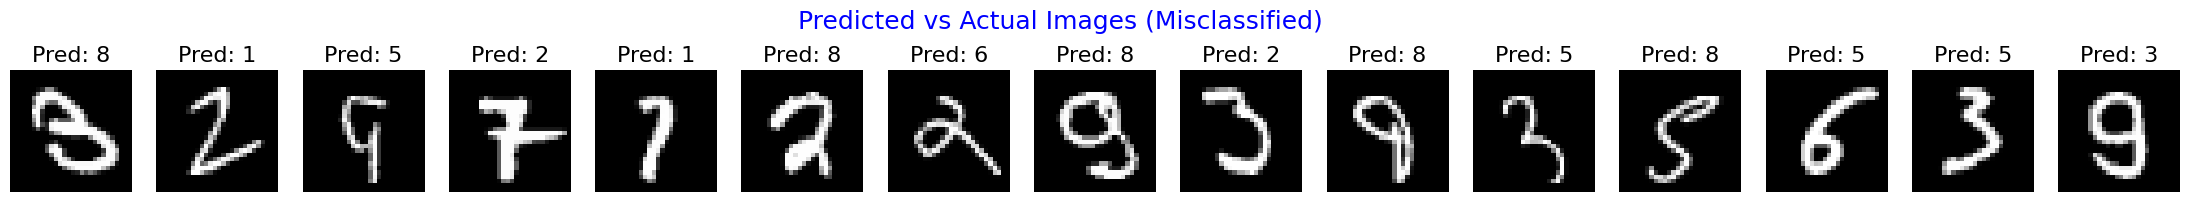

In [61]:
sample_X = X_test[misclassified_indices[0][:15]]
sample_images = sample_X.reshape(num_samples, 28, 28) 
sample_labels_pred = predicted_classes.numpy()[misclassified_indices[0][:15]] #converted to numpy for easier index reference

plt.figure(figsize=(28, 3))
plt.suptitle("Predicted vs Actual Images (Misclassified)", fontsize=18, color='Blue', y=0.9)


for img in range(num_samples):
    plt.subplot(1, num_samples, img +1)
    plt.imshow(sample_images[img], cmap='gray')
    plt.title(f'Pred: {sample_labels_pred[img]}', fontsize=16)
    plt.axis('off')


## Saving and Loading The Model

In [62]:
nn_model.save("nn_model_20241123.keras")

In [35]:
from tensorflow.keras import saving
loaded_model = saving.load_model("nn_model_20241123.keras")